In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [34]:
# Load the CSV file
df_Salaries = pd.read_csv('SalariesX.csv')

# Identify the number of rows and columns
num_rows, num_columns = df_Salaries.shape
print("Number of rows is : " , num_rows)
print("Number of columns is : " , num_columns)

# Determine the data types of each column
data_types = df_Salaries.dtypes
print("Data types of each column:\n" , data_types)

# Check for missing values in each column
print("Boolean missing values in each column: \n", df_Salaries.isnull())

# Count total missing values in each column
print("Count total missing values in each column: \n", df_Salaries.isnull().sum())

Number of rows is :  148654
Number of columns is :  12
Data types of each column:
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
dtype: object
Boolean missing values in each column: 
            Id  EmployeeName  JobTitle  BasePay  OvertimePay  OtherPay  \
0       False         False     False    False        False     False   
1       False         False     False    False        False     False   
2       False         False     False    False        False     False   
3       False         False     False    False        False     False   
4       False         False     False    False        False     False   
...       ...           ...       ...      ...          ...       ...   
148649  False  

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [35]:
mean = df_Salaries['TotalPay'].mean()
median = df_Salaries['TotalPay'].median()
mode = df_Salaries['TotalPay'].mode()[0]
minimum = df_Salaries['TotalPay'].min()
maximum = df_Salaries['TotalPay'].max()
range = maximum - minimum
std = df_Salaries['TotalPay'].std()
print(f"Mean Salary : {mean}")
print(f"Median Salary : {median}")
print(f"Mode Salary : {mode}")
print(f"Minimum Salary : {minimum}")
print(f"Maximum Salary : {maximum}")
print(f"Salary range: {range}")
print(f"Standard Deviation Salary : {std}")

Mean Salary : 74768.32197169267
Median Salary : 71426.60999999999
Mode Salary : 0.0
Minimum Salary : -618.13
Maximum Salary : 567595.43
Salary range: 568213.56
Standard Deviation Salary : 50517.00527394987


3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

Choosing the suitable method for dealing with missing data depends on many factors, such as the nature of data and the purpose of the analysis.

3.1- I droped every column which has no data


In [36]:
df_Salaries = df_Salaries.dropna(how = 'all' , axis = 1)

3.2 -  The Benefits Colums has many null value and If we looked to the data , we will see that Benefits + TotalPay = TotalPayBenefits.
So, I Replaced the Benefits column null value with the value (TotalPayBenefits - TotalPay)

In [ ]:
df_Salaries['Benefits'].fillna(df_Salaries['TotalPayBenefits'] - df_Salaries['TotalPay'] , inplace= True)

3.3 The columns OverTimePay and OtherPay have only 4 null values ,So I used mean function

In [ ]:
df_Salaries['OvertimePay'] = df_Salaries['OvertimePay'].mean()
df_Salaries['OtherPay'] = df_Salaries['OtherPay'].mean()

3.4 If we looked to BasePay Column  , we will see that BasePay + OvertimePay + OtherPay  = TotalPay.
So, I Replaced the BasePay column null value with the value (TotalPay - OvertimePay - OtherPay)

In [ ]:
df_Salaries['BasePay'].fillna(df_Salaries['TotalPay'] - df_Salaries['OvertimePay'] - df_Salaries['OtherPay']  , inplace= True)

4.**Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

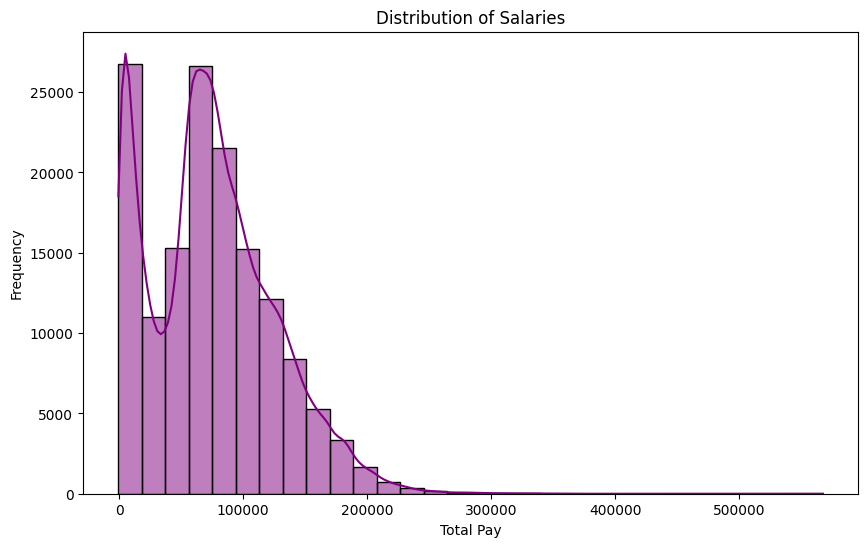

In [40]:
# Set the size of the plot
plt.figure(figsize=(10, 6))
# Create a histogram of the 'TotalPay' column with 30 bins, including a kernel density estimate (kde)
sns.histplot(df_Salaries['TotalPay'], bins=30, kde=True, color='purple')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

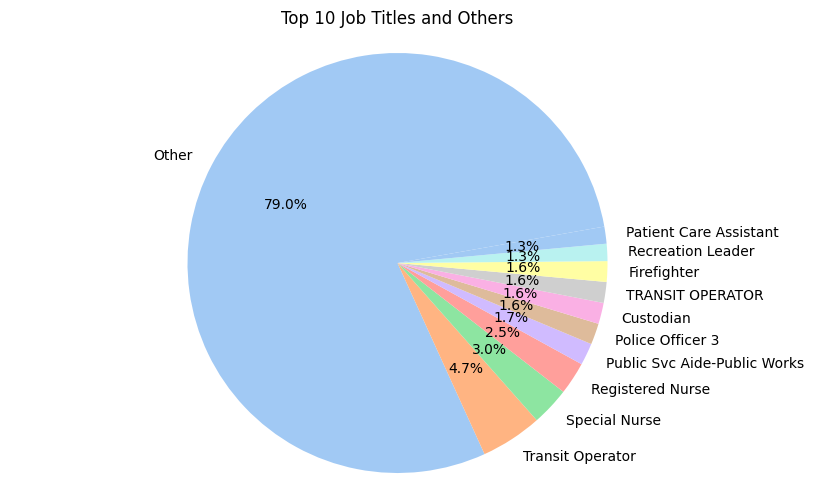

In [41]:
top_job_titles = df_Salaries['JobTitle'].value_counts().head(10).index

# Create a new column 'topJobTitle' where job titles outside the head are labeled as 'Other'
df_Salaries['topJobTitle'] = df_Salaries['JobTitle'].apply(lambda x: x if x in top_job_titles else 'Other')

# Pie chart for the proportion of employees in different departments (using 'topJobTitle' column)
top_job_title_counts = df_Salaries['topJobTitle'].value_counts()
plt.figure(figsize=(10, 6))
# Create a pie chart for the top job titles
plt.pie(top_job_title_counts, labels=top_job_title_counts.index, autopct='%1.1f%%', startangle=10, colors=sns.color_palette('pastel'))
plt.title(f'Top {10} Job Titles and Others')
plt.axis('equal')

plt.show()


5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [42]:
# Group the data by 'JobTitle' and 'Year', and calculate summary statistics for 'TotalPay or Salary'
grouped_data = df_Salaries.groupby(['JobTitle', 'Year'])['TotalPay'].agg(['mean', 'min', 'max', 'median', 'std']).reset_index()

print(grouped_data)

# Create a DataFrame for average salary
average_salary_comparison = grouped_data[['JobTitle', 'Year', 'mean']]

print(average_salary_comparison)


                                            JobTitle  Year          mean  \
0                                      ACCOUNT CLERK  2011  44035.664337   
1                                         ACCOUNTANT  2011  47429.268000   
2                                  ACCOUNTANT INTERN  2011  29031.742917   
3                        ACPO,JuvP, Juv Prob (SFERS)  2014  62290.780000   
4                                      ACUPUNCTURIST  2011  67594.400000   
...                                              ...   ...           ...   
4132  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  2011  53632.870000   
4133                              Youth Comm Advisor  2012  57544.730000   
4134                              Youth Comm Advisor  2013  35823.295000   
4135                              Youth Comm Advisor  2014  36465.910000   
4136                                     ZOO CURATOR  2011  66686.560000   

           min       max     median           std  
0       614.00  60838.20  49777.820

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

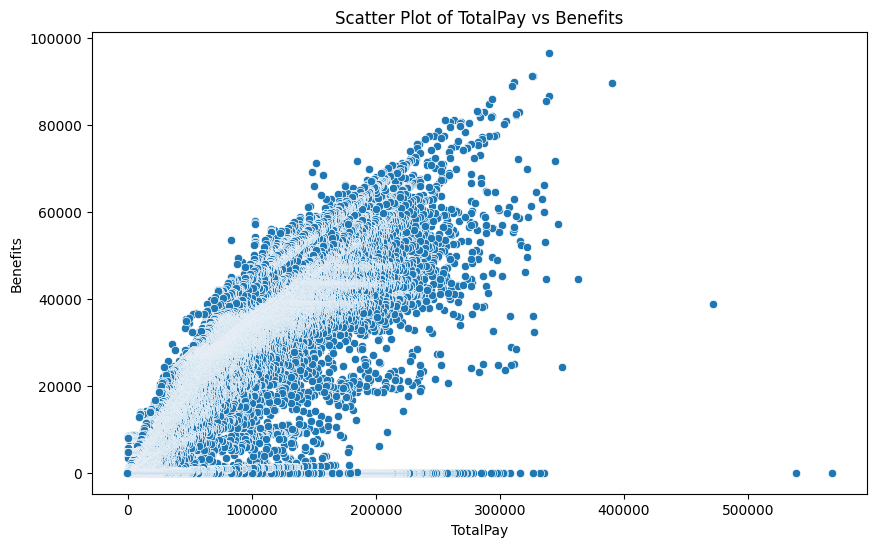

In [43]:
# Calculate the correlation between 'TotalPay' and 'Benefits'
correlation = df_Salaries['TotalPay'].corr(df_Salaries['Benefits'])

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPay', y='Benefits', data=df_Salaries)
plt.title('Scatter Plot of TotalPay vs Benefits')
plt.xlabel('TotalPay')
plt.ylabel('Benefits')
plt.show()

# # Another way is desired sample size to 1000 .
# # The goal  is to make the Scatter plot more clear.
# sample_size = 1000
# df_sample = df_Salaries.sample(n=sample_size, random_state=42)

# # Identify correlation between 'TotalPay' and 'Benefits'
# correlation = df_sample['TotalPay'].corr(df_sample['Benefits'])

# # Plot a scatter plot to visualize the relationship
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='TotalPay', y='Benefits', data=df_sample)
# plt.title('Scatter Plot of TotalPay vs Benefits (Sampled Data)')
# plt.xlabel('TotalPay')
# plt.ylabel('Benefits')
# plt.show()

### 7. **Summary of Insights**
- **Basic Data Exploration**

 - The dataset contains 148,654 rows and 12 columns.
 - The data types of the columns include integers (int64), floating-point numbers (float64), and objects (object).

 - The 'Notes' column has all missing values.
 - The 'Benefits' column has a larg number of missing values (36,163 missing values).
 - Other columns such as 'BasePay,' 'OvertimePay,' and 'OtherPay' have a small number of missing values.

- **Descriptive Statistics**
 - The average (mean) salary across the dataset is approximately 74,768.32.
 - The median salary, representing the middle value of the dataset, is approximately 71,426.61.
 - The mode salary, the most frequently occurring value, is reported as 0.0. This suggests a presence of zero salaries in the dataset, which might be indicative of unpaid roles or data entry issues.
 - The minimum reported salary is -618.13, which seems unusual.
 - The maximum reported salary is 567,595.43.
 - The range of salaries in the dataset spans 568,213.56, from the minimum to the maximum salary.
 - The standard deviation of salaries is approximately 50,517.01. This measures the amount of variation or dispersion in the dataset, suggesting that salaries vary considerably.
- **Data Cleaning**
 - Columns with no data were dropped, ensuring a cleaner dataset.
 - The 'Benefits' column had a significant number of missing values, and it was observed that Benefits + TotalPay = TotalPayBenefits so the missing values in the 'Benefits' column were replaced with the calculated values (TotalPayBenefits - TotalPay).
 - The 'OvertimePay' and 'OtherPay' columns had a small number of missing values (4 each) so the missing values in these columns were imputed using the mean value of the respective columns.
 - The 'BasePay' column was found to be related to 'OvertimePay' and 'OtherPay' through the equation BasePay + OvertimePay + OtherPay = TotalPay so missing values in the 'BasePay' column were replaced with the calculated values (TotalPay - OvertimePay - OtherPay).
- **Basic Data Visualization**
 - Histograms chart : I use only 30 bins to be the data clearly , also we can use 'auto'
 - Pie chart : Because the number of unique job titles is too large, creating a pie chart with all of them can indeed be visually overwhelming and unclear. so  the dataset was processed to focus on the top 10 most frequent job titles, making the chart more interpretable.
- **Grouped Analysis**
  - I grouped the data by 'JobTitle' and 'Year.'
Calculated mean, minimum ('min'), maximum ('max'), median ('median'), and standard deviation ('std') of salaries ('TotalPay') for each group.

 - I selected job title ('JobTitle'), year ('Year'), and average salary ('mean') data to compare the average salaries across different groups.

 - These findings offer a quick and concise overview of average salaries for different job titles over the years, making it easier to grasp trends and differences.
- **Simple Correlation Analysis**
 - I calculated the correlation  between employee salaries ('TotalPay') and benefits ('Benefits').
 - correlation = df_Salaries['TotalPay'].corr(df_Salaries['Benefits']): This computes the correlation value, which ranges from -1 to 1. A positive value indicates a positive correlation, while a negative value indicates a negative correlation.
 - Another way and I commit it above:
   - I set the desired sample size to 1000 using sample_size = 1000.
   - The goal of setting the data size is to make the Scatter plot more clear and understandable.